In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

import warnings
warnings.simplefilter('ignore')

In [52]:
df=pd.read_csv('csse_covid_19_daily_reports_us.csv')
df.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        58 non-null     object 
 1   Country_Region        58 non-null     object 
 2   Last_Update           58 non-null     object 
 3   Lat                   56 non-null     float64
 4   Long_                 56 non-null     float64
 5   Confirmed             58 non-null     int64  
 6   Deaths                58 non-null     int64  
 7   Recovered             42 non-null     float64
 8   Active                58 non-null     float64
 9   FIPS                  58 non-null     int64  
 10  Incident_Rate         56 non-null     float64
 11  People_Tested         56 non-null     float64
 12  People_Hospitalized   33 non-null     float64
 13  Mortality_Rate        57 non-null     float64
 14  UID                   58 non-null     int64  
 15  ISO3                  58 

In [54]:
df.shape

(58, 18)

In [55]:
df=df.drop(columns=["Lat", "Long_", "FIPS", "UID", "People_Hospitalized", "Hospitalization_Rate", "Country_Region"], inplace=False)
df.head()

,Province_State,Last_Update,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,Mortality_Rate,ISO3,Testing_Rate
0,Alabama,2020-05-21 02:32:54,13052,522,NaN,12530.0,266.194321,164450.0,3.999387,USA,3353.942386
1,Alaska,2020-05-21 02:32:54,401,10,352.0,39.0,54.815493,37045.0,2.493766,USA,5063.940017
2,American Samoa,2020-05-21 02:32:54,0,0,NaN,0.0,0.000000,124.0,NaN,ASM,222.857246
3,Arizona,2020-05-21 02:32:54,14906,747,3773.0,10386.0,204.788838,165435.0,5.011405,USA,2272.859351
4,Arkansas,2020-05-21 02:32:54,5003,107,3852.0,1044.0,165.782801,96258.0,2.138717,USA,3189.670370


We dropped the column which are less useful in prediction of the dataset.

In [56]:
df=df.query('ISO3 == "USA"', inplace=False).reset_index(drop=True)
df=df.loc[(df['Province_State'] != "Grand Princess") & (df['Province_State'] != "Diamond Princess")].reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province_State  51 non-null     object 
 1   Last_Update     51 non-null     object 
 2   Confirmed       51 non-null     int64  
 3   Deaths          51 non-null     int64  
 4   Recovered       39 non-null     float64
 5   Active          51 non-null     float64
 6   Incident_Rate   51 non-null     float64
 7   People_Tested   51 non-null     float64
 8   Mortality_Rate  51 non-null     float64
 9   ISO3            51 non-null     object 
 10  Testing_Rate    51 non-null     float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ KB


We removed territories that are not part of US(ISO3).

In [57]:
Total_Cases = df.groupby('Province_State')['Confirmed'].sum().sort_values(ascending=False).to_frame()
Total_Cases.style.background_gradient(cmap='Reds')

,Confirmed
Province_State,
New York,354370
New Jersey,150776
Illinois,100418
Massachusetts,88970
California,85997
Pennsylvania,68126
Michigan,53009
Texas,51673
Florida,47471


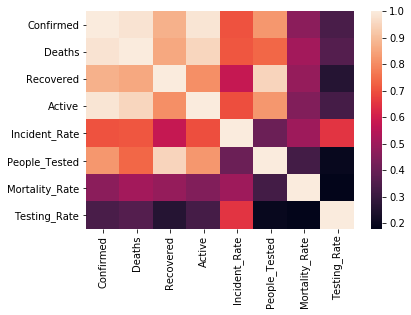

In [58]:
corr = df.corr()
corr = (corr)
sns.heatmap(corr)

In [59]:
feat = df.drop("Mortality_Rate", axis = 1)
labels =df["Mortality_Rate"].copy()

In [60]:
X_train, X_test, y_train, y_test = train_test_split(feat, labels, random_state = 1)